In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/home/bartek/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,windows_size, look_ahead=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size-look_ahead-1):
        a = dataset[i:(i+window_size), 0]
        b= dataset[i:(i+window_size),1]
        dataX.append((a,b))
        dataY.append(dataset[i+window_size + look_ahead-1, 0])
    return numpy.array(dataX), numpy.array(dataY)

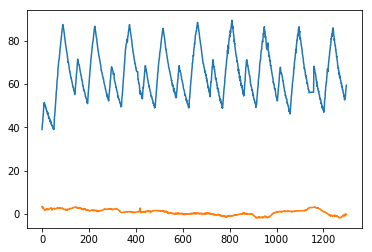

In [6]:
P1dataset = pandas.read_csv('piec.csv', usecols=[2,3], engine='python', skipfooter=3)
#P2dataset= pandas.read_csv('piec.csv', usecols=[2], engine='python', skipfooter=3)
plt.plot(P1dataset)
#plt.plot(P2dataset)
plt.show()

In [7]:
P1dataset.tail(4)

,V1,V2
1295,56.75,0.0
1296,57.25,0.0
1297,58.75,0.0
1298,59.50,-0.2


In [8]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scalerB= MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(P1dataset)
#datasetB = scalerB.fit_transform(P2dataset)


In [9]:
dataset

array([[0.        , 0.96226415],
       [0.03960396, 0.90566038],
       [0.05940594, 1.        ],
       ...,
       [0.36138614, 0.33962264],
       [0.39108911, 0.33962264],
       [0.40594059, 0.30188679]])

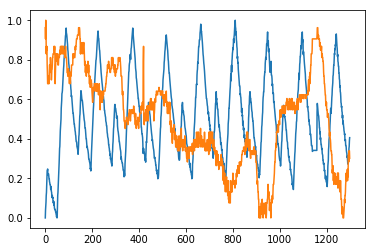

In [10]:
plt.plot(dataset)
#plt.plot(datasetB)
plt.show()

In [11]:
dataset

array([[0.        , 0.96226415],
       [0.03960396, 0.90566038],
       [0.05940594, 1.        ],
       ...,
       [0.36138614, 0.33962264],
       [0.39108911, 0.33962264],
       [0.40594059, 0.30188679]])

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

870 429


In [82]:
# reshape into X=t and Y=t+1
look_back = 5
window_size=10
trainX, trainY = create_dataset(train, window_size,look_back)
testX, testY = create_dataset(test, window_size,look_back)

In [83]:
testY.shape

(413,)

In [84]:
trainX[0:8]

array([[[0.        , 0.03960396, 0.05940594, 0.07920792, 0.11386139,
         0.12871287, 0.17326733, 0.2029703 , 0.23762376, 0.23762376],
        [0.96226415, 0.90566038, 1.        , 0.98113208, 0.83018868,
         0.86792453, 0.8490566 , 0.86792453, 0.77358491, 0.73584906]],

       [[0.03960396, 0.05940594, 0.07920792, 0.11386139, 0.12871287,
         0.17326733, 0.2029703 , 0.23762376, 0.23762376, 0.24752475],
        [0.90566038, 1.        , 0.98113208, 0.83018868, 0.86792453,
         0.8490566 , 0.86792453, 0.77358491, 0.73584906, 0.67924528]],

       [[0.05940594, 0.07920792, 0.11386139, 0.12871287, 0.17326733,
         0.2029703 , 0.23762376, 0.23762376, 0.24752475, 0.22277228],
        [1.        , 0.98113208, 0.83018868, 0.86792453, 0.8490566 ,
         0.86792453, 0.77358491, 0.73584906, 0.67924528, 0.67924528]],

       [[0.07920792, 0.11386139, 0.12871287, 0.17326733, 0.2029703 ,
         0.23762376, 0.23762376, 0.24752475, 0.22277228, 0.21782178],
        [0.98113208, 

In [85]:
trainY[1]

0.20792079207920788

In [86]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = testX.reshape(testX.shape[0],  testX.shape[1],1)
#testX = testX.reshape(testX.shape + (1,))
#trainX=trainX.reshape(trainX.shape+ (1,))

In [87]:
trainX.shape
#dataset.shape

(854, 2, 10)

In [88]:
trainX.reshape(-1,4)

array([[0.        , 0.03960396, 0.05940594, 0.07920792],
       [0.11386139, 0.12871287, 0.17326733, 0.2029703 ],
       [0.23762376, 0.23762376, 0.96226415, 0.90566038],
       ...,
       [0.32178218, 0.35148515, 0.35849057, 0.39622642],
       [0.33962264, 0.39622642, 0.39622642, 0.39622642],
       [0.43396226, 0.37735849, 0.41509434, 0.43396226]])

In [89]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(2,window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
 - 1s - loss: 0.0531
Epoch 2/20
 - 1s - loss: 0.0272
Epoch 3/20
 - 1s - loss: 0.0127
Epoch 4/20
 - 1s - loss: 0.0060
Epoch 5/20
 - 1s - loss: 0.0048
Epoch 6/20
 - 1s - loss: 0.0044
Epoch 7/20
 - 1s - loss: 0.0043
Epoch 8/20
 - 1s - loss: 0.0042
Epoch 9/20
 - 1s - loss: 0.0041
Epoch 10/20
 - 1s - loss: 0.0038
Epoch 11/20
 - 1s - loss: 0.0039
Epoch 12/20
 - 1s - loss: 0.0040
Epoch 13/20
 - 1s - loss: 0.0039
Epoch 14/20
 - 1s - loss: 0.0037
Epoch 15/20
 - 1s - loss: 0.0035
Epoch 16/20
 - 1s - loss: 0.0037
Epoch 17/20
 - 1s - loss: 0.0035
Epoch 18/20
 - 1s - loss: 0.0035
Epoch 19/20
 - 1s - loss: 0.0034
Epoch 20/20
 - 1s - loss: 0.0035


In [90]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict[0]

array([0.33050415], dtype=float32)

In [101]:
#trainPredict.reshape(-1)
#trainPb = numpy.append(trainPredict,numpy.zeros([len(trainPredict),1]),1)
#trainYb=numpy.append(trainY,numpy.zeros([len(trainY),1]),0)
#testPredict.reshape(-1)
trainYY=trainY.reshape(trainY.shape+(1,))
testYY=testY.reshape(testY.shape+(1,))
trainYY[1:10]


array([[0.20792079],
       [0.1980198 ],
       [0.1980198 ],
       [0.18316832],
       [0.17821782],
       [0.16831683],
       [0.16831683],
       [0.16336634],
       [0.14356436]])

In [104]:
#x=[trainY,trainY]
#yy= scaler.inverse_transform(x)
trainPredict[1:10]

array([[0.31663275],
       [0.25594503],
       [0.25327185],
       [0.24949408],
       [0.26146233],
       [0.26363796],
       [0.22934878],
       [0.23787531],
       [0.24495977]], dtype=float32)

In [75]:
# convert an array of values into a dataset matrix
def inverse_dataset(_scaler,dset):
    x=numpy.append(dset,dset,1)
    yy= _scaler.inverse_transform(x)
    return yy[:,0]

In [106]:
# invert predictions
trainSPredict = inverse_dataset(scaler,trainPredict)
trainSY = inverse_dataset(scaler,trainYY)
trainSPredict
#testPredict = inverse_dataset(testPredict)
#testY = inverse_dataset([testY])

array([55.69046 , 54.989956, 51.92522 , 51.790226, 51.599453, 52.20385 ,
       52.313713, 50.582115, 51.012707, 51.370464, 51.864857, 51.364025,
       49.909134, 50.708366, 50.265114, 49.804085, 47.84694 , 46.238895,
       46.40613 , 45.67128 , 46.607952, 48.199886, 48.123096, 49.45668 ,
       48.91803 , 48.041725, 47.663124, 47.965816, 47.805138, 47.77348 ,
       46.395157, 46.081287, 45.292248, 42.161613, 41.51384 , 41.312202,
       43.348526, 46.557793, 45.114063, 45.315678, 45.798454, 43.982586,
       45.512875, 48.724094, 52.02295 , 54.383648, 55.105125, 55.424236,
       58.460236, 61.571877, 62.153847, 64.2876  , 65.48593 , 65.897446,
       67.27313 , 68.2653  , 69.5302  , 70.895485, 69.72856 , 71.78324 ,
       73.13194 , 74.97325 , 75.962425, 75.88115 , 75.47782 , 76.102394,
       75.550606, 77.85689 , 79.40339 , 79.681564, 80.89112 , 81.83806 ,
       81.72421 , 83.85334 , 83.99047 , 84.90296 , 85.297165, 86.71897 ,
       87.0411  , 88.47572 , 87.39097 , 85.97733 , 

In [123]:
# calculate root mean squared error
wws=window_size+look_back-1
trainScore = math.sqrt(mean_squared_error(dataset[wws:len(trainY)+wws,0], trainY))
print('Train Score: %.5f RMSE' % (trainScore))
trainSScore = math.sqrt(mean_squared_error(trainSY, trainSPredict))
print('Train SScore: %.5f RMSE' % (trainSScore))
testScore = math.sqrt(mean_squared_error(testYY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.00000 RMSE
Train SScore: 2.73405 RMSE
Test Score: 0.060 RMSE


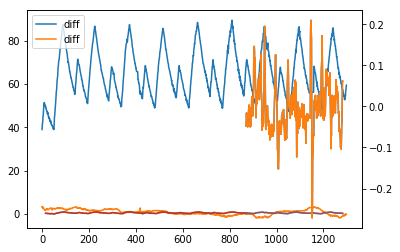

In [130]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=window_size+look_back;
trainPredictPlot[wws:len(trainPredict)+wws, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-window_size-look_back-1, :] = testPredict
diffPlot=testYY-testPredict
diffPredictPlot = numpy.empty_like(dataset)
diffPredictPlot[:, :] = numpy.nan
diffPredictPlot[len(trainPredict)+wws+1:len(dataset)-window_size-look_back-1, :] = diffPlot
# plot baseline and predictions
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(scaler.inverse_transform(dataset),label="set")
ax1.plot(trainPredictPlot,label="train")
ax1.plot(testPredictPlot,label="test")
ax2.plot(diffPredictPlot,label="diff")
plt.legend()
plt.show()